<a href="https://colab.research.google.com/github/cvs2010/computer_vision/blob/main/Projeto_02_Introdu%C3%A7%C3%A3o_ao_OpenCV_e_Opera%C3%A7%C3%B5es_B%C3%A1sicas_e_Matem%C3%A1ticas_em_Imagens_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:blue; text-align:center;">Projeto 02: Introdução ao OpenCV e Operações Básicas e Matemáticas em Imagens 📚</h1>

<hr>

Conceitos básicos e muito importantes para manipulação de imagens, utilizando a biblioteca OpenCV.

<h2 style="color:green; text-align:center;">1. Visão Geral</h2>

Os principais tópicos que este notebook inclue:

- Fundamentos de imagem no OpenCV
- Conceitos de pixel, cores e canais
- O sistema de coordenadas no OpenCV
- Acessando e manipulando pixels no OpenCV
- BGR vs RGB

<h2 style="color:green; text-align:center;">2. Introdução ao OpenCV</h2>

OpenCV é uma biblioteca de programação em C++ com capacidades em tempo real. Como é escrita em C/C++ otimizado, a biblioteca pode se beneficiar do processamento multi-core. Uma introdução teórica sobre a biblioteca OpenCV é realizada na próxima seção.

A biblioteca OpenCV é popular por várias razões, incluindo:

- É uma biblioteca de visão computacional de código aberto
- É uma biblioteca específica para processamento de imagens
- Possui mais de 2.500 algoritmos otimizados, incluindo algoritmos de visão computacional de última geração
- Suporte para aprendizado de máquina e aprendizado profundo
- Possui interfaces para C++, Python, Java e MATLAB
- A biblioteca suporta Windows, Linux, Android e macOS

<h3 style="color:green;">Módulos do OpenCV</h3>

O OpenCV é dividido em vários módulos. Cada módulo pode ser entendido, em geral, como sendo dedicado a um grupo de problemas de visão computacional. Os principais módulos são brevemente descritos aqui.

<center>
    <img src="https://www.oreilly.com/api/v2/epubs/9781789344912/files/assets/2bf8b1ee-1a38-410e-ba15-b566ccfb19f2.png">
</center>

- `core`: *Funcionalidade principal*. Este módulo define estruturas de dados básicas e também funções básicas usadas por todos os outros módulos na biblioteca.
- `imgproc`: *Processamento de imagens*. Um módulo de processamento de imagens que inclui filtragem de imagens, transformações geométricas de imagens, conversão de espaço de cores e histogramas.
- `imgcodecs`: *Codecs de imagem*. Leitura e escrita de arquivos de imagem.
- `videoio`: *E/S de vídeo*. Uma interface para captura de vídeo e codecs de vídeo.
- `highgui`: *GUI de alto nível*. Uma interface para capacidades de interface do usuário. Ele fornece uma interface para fazer facilmente o seguinte:
    - Criar e manipular janelas que podem exibir/mostrar imagens
    - Adicionar barras de rastreamento às janelas, comandos de teclado e manipular eventos do mouse
- `video`: *Análise de vídeo*. Um módulo de análise de vídeo incluindo algoritmos de subtração de fundo, estimativa de movimento e rastreamento de objetos.
- `calib3d`: *Calibração de câmera e reconstrução 3D*. Este módulo cobre algoritmos básicos de geometria de múltiplas visões, algoritmos de correspondência estéreo, estimativa de pose de objetos, calibração de uma única câmera e estéreo, e também reconstrução 3D.
- `features2d`: *Framework de recursos 2D*. Este módulo inclui detectores de recursos, descritores e correspondentes de descritores.
- `objdetect`: *Detecção de objetos*. Detecção de objetos e instâncias de classes pré-definidas (por exemplo, rostos, olhos, pessoas e carros).
- `dnn`: *Módulo de rede neural profunda (DNN)*. Este módulo contém o seguinte:
    - API para criação de novas camadas
    - Conjunto de camadas úteis integradas
    - API para construir e modificar redes neurais a partir de camadas
    - Funcionalidade para carregar modelos de redes serializadas de diferentes frameworks de aprendizado profundo
- `ml`: *Aprendizado de máquina*. A Biblioteca de Aprendizado de Máquina (MLL) é um conjunto de classes e métodos que podem ser usados para fins de classificação, regressão e agrupamento.
- `flann`: *Agrupamento e pesquisa em espaços multidimensionais*. Fast Library for Approximate Nearest Neighbors (FLANN) é uma coleção de algoritmos que são altamente adequados para pesquisas rápidas de vizinhos mais próximos.
- `photo`: *Fotografia computacional*. Este módulo implementa um pipeline de junção que realiza a junção automática de imagens panorâmicas.
- `stitching`: *Junção de imagens*. Este módulo implementa um pipeline de junção que realiza a junção automática de imagens panorâmicas.
- `shape`: *Distância e correspondência de formas*. Este módulo pode ser usado para correspondência de formas, recuperação ou comparação.
- `superres`: *Super-resolução*. Este módulo contém um conjunto de classes e métodos que podem ser usados para aprimoramento de resolução.
- `videostab`: *Estabilização de vídeo*. Este módulo contém um conjunto de classes e métodos para estabilização de vídeo.
- `viz`: *Visualizador 3D*. Este módulo é usado para exibir widgets que fornecem vários métodos para interagir com cenas e widgets.

<h2 style="color:green; text-align:center;">3. Mão à Obra</h2>

Bibliotecas necessárias para nossa análise. As bibliotecas a serem importadas são:

- **cv2**: Usada para manipulação de imagem e vídeo.
- **matplotlib**: Usada para visualização de dados e imagens.
- **numpy**: Usada para computação científica e manipulação de arrays.

E finalmente, usamos `%matplotlib inline` para garantir que todos os gráficos e imagens sejam exibidos diretamente no notebook em vez de serem exibidos em uma nova janela, `matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)` para configurar o tamanho padrão das figuras geradas pela biblioteca Matplotlib, e `matplotlib.rcParams['image.cmap'] = 'gray'` para configurar o mapa de cores padrão usado pela biblioteca Matplotlib para 'gray'.

<div class="alert alert-success">
Um mapa de cores é uma forma de mapear intensidades de dados para cores visuais, e o mapa `gray` é um mapa de cores em tons de cinza.
</div>


<h3 style="color:green;">Carregando Imagens com OpenCV</h3>

Vamos começar lendo uma imagem do disco usando a função `imread` do OpenCV. A sintaxe para isso em Python e C++ é a seguinte:

Esses comandos abaixo carregam a imagem especificada do disco para a memória. No caso do Python, a imagem é armazenada como um objeto NumPy multidimensional, enquanto no C++ ela é armazenada como um objeto `Mat`.

```python
# Python
img = cv2.imread("image.png", cv2.IMREAD_COLOR)
```

```c++
// C++
Mat img = imread("image.png", IMREAD_COLOR);
```

Aqui, o primeiro argumento é o nome da imagem que você deseja ler. O segundo argumento é um sinalizador opcional que poderia ser qualquer um dos seguintes métodos para a leitura de imagens:

- `cv2.IMREAD_COLOR`: Carrega uma imagem colorida. Qualquer transparência da imagem será ignorada. Este é o sinalizador padrão.
- `cv2.IMREAD_GRAYSCALE`: Carrega a imagem em modo de escala de cinza.
- `cv2.IMREAD_UNCHANGED`: Carrega a imagem como tal, incluindo o canal alfa.

A função `imread` retorna uma matriz multi-dimensional que contém os valores de intensidade de pixel da imagem. Para obter uma compreensão completa da função `imread` e suas diversas opções, você pode consultar a [documentação oficial do OpenCV](https://docs.opencv.org/4.7.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56).



In [ ]:
# importar bibliotecas
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import matplotlib
import requests
import os

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

<center>
    <img src="https://github.com/cvs2010/computer_vision/blob/main/files/c_cinza.png?raw=true" width="50">
</center>


Carregando a imagem c_cinza no pool do notebook

In [ ]:
url = "https://github.com/cvs2010/computer_vision/blob/main/files/c_cinza.png?raw=true"

response = requests.get(url)
response.raise_for_status()

with open('/content/c_cinza.png', 'wb') as file:
    file.write(response.content)

Lendo o conteúdo da imagem

In [ ]:
letra_c = cv2.imread("/content/c_cinza.png", 0)
print(letra_c)

[[255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0]]


### Propriedades da Imagem

In [ ]:
print("Tipo (pixels): {}\n".format(letra_c.dtype))
print("Tipo (objeto): {}\n".format(type(letra_c.dtype)))
print("Dimensões: {}\n".format(letra_c.shape))

Tipo (pixels): uint8

Tipo (objeto): <class 'numpy.dtype[uint8]'>

Dimensões: (15, 15)



<div class="alert alert-success">
No OpenCV, o tamanho é representado como uma tupla de $\text{largura } x \text{ altura}$ ou $\text{#colunas } x \text{ #linhas}$. Mas no NumPy, o método shape retorna o tamanho como uma tupla de $\text{altura } x \text{ largura}$.
</div>

### Manipulando Pixels [linha, coluna]

In [ ]:
# Exibir a linha 0, coluna 2
print(letra_c[0,2])

255


In [ ]:
# Transformar a linha 0, coluna 2 de 255 para 0
letra_c[0,2] = 0
print(letra_c[0,2])

0


In [ ]:
# Criando um ROI (Region of Interest) na imagem
# ROI = imagem[y:y+h, x:x+w] ; Linha 0 a 10, Coluna 0 a 5
roi = letra_c[0:10, 0:5]

In [ ]:
print(roi)

[[255 255   0 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]]


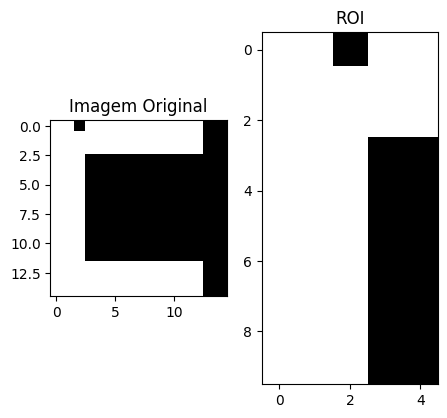

In [ ]:
# Criando uma nova figura para exibir as imagens
plt.figure(figsize=[5, 5])

# Exibindo a imagem original
# Lembre-se de que o OpenCV carrega imagens no formato BGR, então precisamos inverter os canais para exibir corretamente
plt.subplot(121) # subplot(linha, coluna, posição) = (221) linha 1 coluna 2, subplot número 1
plt.imshow(letra_c)
plt.title('Imagem Original')

# Exibindo o ROI
plt.subplot(122) # subplot(linha, coluna, posição) = (222) linha 1 coluna 2, subplot número 2
plt.imshow(roi)
plt.title('ROI')

plt.show()

A biblioteca matplotlib do Python não respeita automaticamente a escala da imagem original quando plota uma região de interesse (ROI, Region of Interest). Para manter a escala original, é preciso especificar explicitamente o tamanho da imagem usando a função figsize quando você cria sua figura.

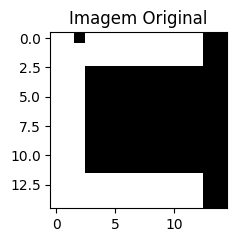

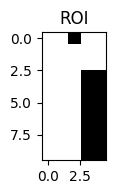

In [ ]:
# Obter as dimensões da imagem original e do ROI
h_original, w_original = letra_c.shape[:2]
h_roi, w_roi = roi.shape[:2]

# Definir o tamanho da figura com base nas dimensões das imagens
figsize_original = (5, 5) # por exemplo
scale = min(h_roi / h_original, w_roi / w_original) # escala do ROI em relação à imagem original
# a escala resultante scale será a menor proporção entre a altura e a largura, permitindo
# que a imagem ou a região de interesse seja redimensionada de forma proporcional para se
# ajustar às dimensões desejadas (h_roi, w_roi).
figsize_roi = (figsize_original[0] * scale, figsize_original[1] * scale)

# Criar as figuras
plt.figure(figsize=figsize_original)

# Exibir a imagem original
plt.subplot(121)
plt.imshow(letra_c)
plt.title('Imagem Original')

# Criar uma nova figura para o ROI com o tamanho ajustado
plt.figure(figsize=figsize_roi)

# Exibir o ROI
plt.imshow(roi)
plt.title('ROI')

plt.show()

### Dividindo e Mesclando Canais

In [ ]:
url = "https://github.com/cvs2010/computer_vision/blob/main/files/foto_ccc.png?raw=true"

response = requests.get(url)
response.raise_for_status()

with open('/content/foto_ccc.png', 'wb') as file:
    file.write(response.content)

In [ ]:
img = cv2.imread("/content/foto_ccc.png")

É importante entender o que estamos prestes a fazer. Vamos usar o método `plt.imshow(img)`. Este método é parte da biblioteca *matplotlib*, e é usado para plotar a imagem.

Vale ressaltar que o método `plt.imshow()` espera que a imagem seja no formato RGB, mas a biblioteca *OpenCV* carrega imagens no formato BGR. Portanto, se você estiver carregando sua imagem usando *OpenCV*, será necessário converter os canais de cores de BGR para RGB antes de plotar a imagem. No entanto, neste exemplo, estamos plotando a imagem sem fazer essa conversão.


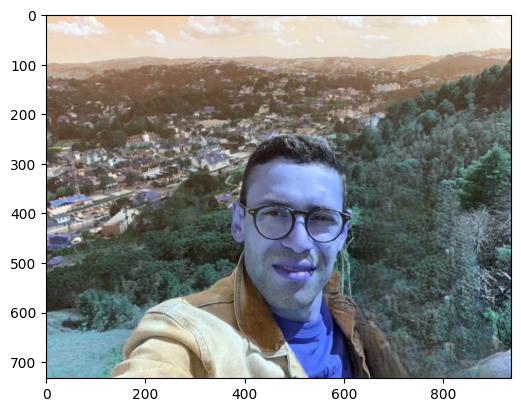

In [ ]:
plt.imshow(img);

Novamente, vamos nos preparar para a próxima linha de código. Agora, utilizaremos `plt.imshow(img[...,::-1])`. O que estamos fazendo aqui é inverter a ordem dos canais de cores da imagem. Lembre-se que mencionamos anteriormente que *OpenCV* carrega as imagens no formato BGR, enquanto métodos como `plt.imshow()` esperam que a imagem esteja no formato RGB.

O trecho `[...,::-1]` é uma operação de fatiamento em Python que inverte a ordem dos canais. Em termos simples, estamos convertendo a imagem de BGR para RGB.

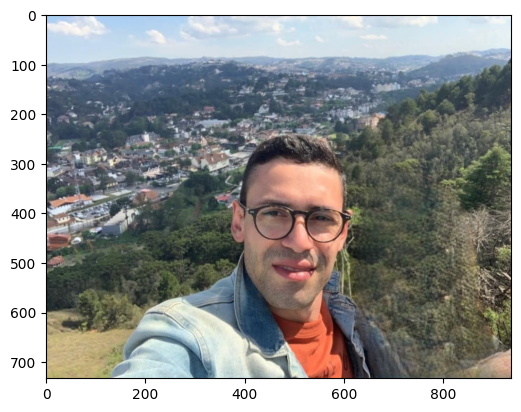

In [ ]:
plt.imshow(img[...,::-1])

No próximo trecho de código, estamos fazendo várias coisas:

1. Estamos dividindo a imagem em seus canais de cores separados com `b, g, r = cv2.split(img)`. Isso nos dá três imagens em escala de cinza, cada uma representando a quantidade de azul, verde e vermelho, respectivamente, em cada pixel da imagem.

2. Em seguida, usamos `plt.figure(figsize=[20,5])` para criar uma nova figura com um tamanho específico.

3. Com `plt.subplot()`, estamos criando vários subgráficos na mesma figura. Cada subplot exibirá uma das imagens de canal de cor que criamos anteriormente, bem como a imagem original invertida em RGB.

Text(0.5, 1.0, 'Imagem RGB')

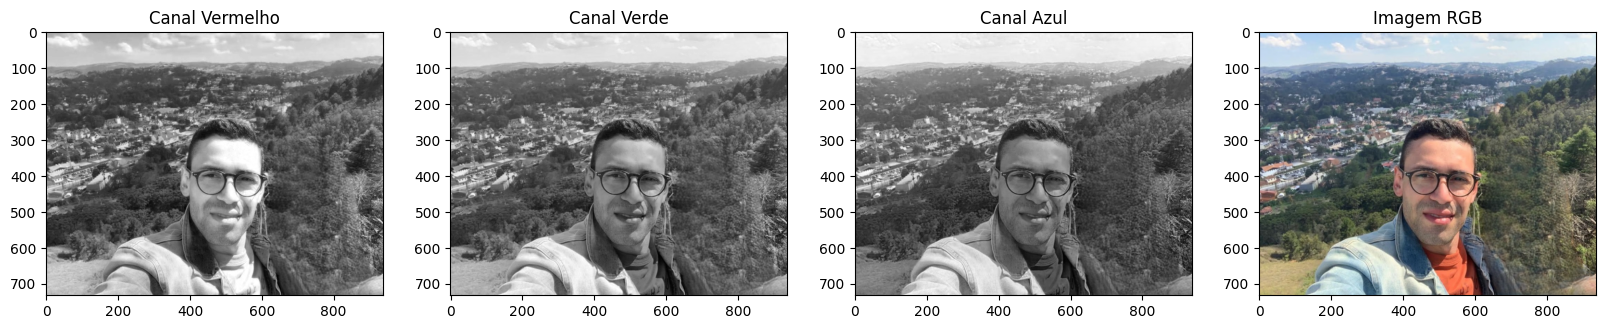

In [ ]:
# Dividindo a imagem em seus respectivos canais de cor.
b, g, r = cv2.split(img)

# Criando uma nova figura com tamanho específico.
plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(r);plt.title('Canal Vermelho')
plt.subplot(142);plt.imshow(g);plt.title('Canal Verde')
plt.subplot(143);plt.imshow(b);plt.title('Canal Azul')

# realizando o merge dos canais
img_merged = cv2.merge((b, g, r))

# plots com canais separados e imagem final composta
plt.subplot(144);plt.imshow(img_merged[...,::-1]);plt.title('Imagem RGB')

No exemplo anterior, carregamos uma imagem sem transparência. Como você viu, ao executar `img.shape` houve apenas 3 canais. Agora, vamos lidar com um tipo diferente de imagem **- uma imagem PNG que contém um canal alfa de transparência.** Quando carregamos essa imagem com `cv2.imread()`, passando `-1` como segundo argumento para garantir que todos os canais (incluindo o alfa) sejam carregados, notamos que a função `img.shape` retorna 4 canais.

Isso acontece porque as imagens PNG podem conter um quarto canal, o canal alfa. Este canal adiciona informações de transparência à imagem, permitindo que certos pixels da imagem sejam parcial ou totalmente transparentes.

Dessa forma, ao manipular ou visualizar este tipo de imagem, é importante levar em consideração este quarto canal. Veja como temos que fazer:

1. `ushuaia_bgr = ushuaia[:,:,0:3]` e `ushuaia_alpha = ushuaia[:,:,3]` separam a imagem original em seus canais de cor (BGR) e canal alfa. O canal alfa é uma camada de imagem que controla a transparência de cada pixel da imagem.

2. `blank_image = np.zeros(ushuaia_bgr.shape, dtype=np.uint8)` cria uma imagem totalmente preta com as mesmas dimensões da imagem original. Esta imagem será usada como base para aplicar a máscara alfa.

3. `ushuaia_bgr_masked = cv2.bitwise_and(ushuaia_bgr, ushuaia_bgr, mask=ushuaia_alpha)` aplica a máscara alfa à imagem BGR. A função `cv2.bitwise_and()` realiza uma operação AND bit a bit entre a imagem BGR e ela mesma, mas considerando apenas os pixels onde a máscara alfa é diferente de zero. Isso efetivamente "aplica" a transparência da máscara alfa à imagem BGR.

4. Finalmente, `plt.imshow(ushuaia_bgr_masked[:,:,::-1])` e `plt.imshow(ushuaia_alpha, cmap='gray')` exibem a imagem BGR com a máscara alfa aplicada e o canal alfa isolado, respectivamente. Note que `[...,::-1]` é usado para converter a imagem de BGR para RGB para exibição correta.


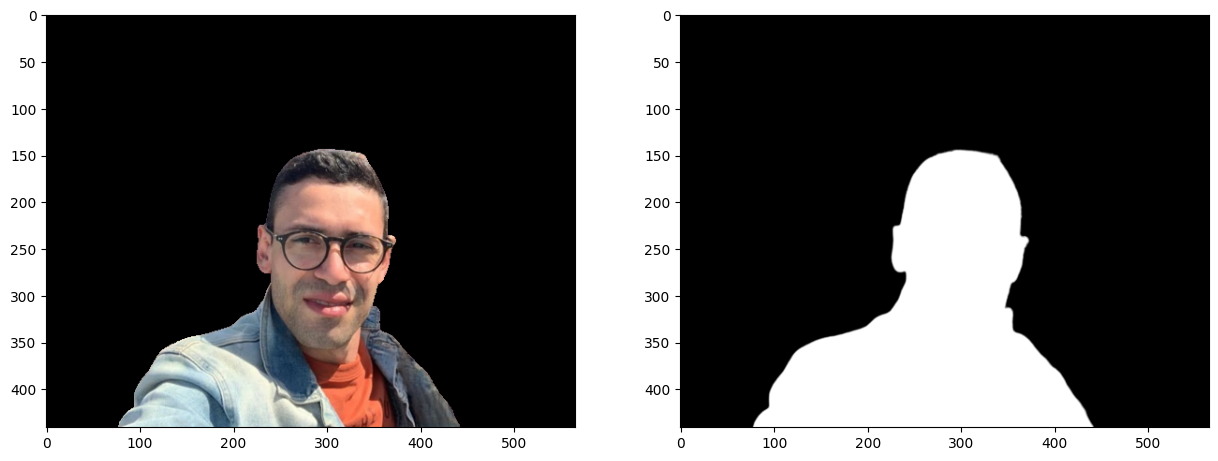

In [ ]:
import numpy as np

url = "https://github.com/cvs2010/computer_vision/blob/main/files/foto_ccc_s_fundo.png?raw=true"

response = requests.get(url)
response.raise_for_status()

with open('/content/foto_ccc_s_fundo.png', 'wb') as file:
    file.write(response.content)

# carregar imagem com canal alpha
ushuaia = cv2.imread('/content/foto_ccc_s_fundo.png', -1)

# Sua imagem BGR e canal alfa
ushuaia_bgr = ushuaia[:,:,0:3]
ushuaia_alpha = ushuaia[:,:,3]

# Criar uma imagem em branco com o mesmo tamanho que a imagem original
blank_image = np.zeros(ushuaia_bgr.shape, dtype=np.uint8)

# Aplicar a máscara alfa à imagem BGR
ushuaia_bgr_masked = cv2.bitwise_and(ushuaia_bgr, ushuaia_bgr, mask=ushuaia_alpha)

# Exibir a imagem BGR com a máscara alfa aplicada
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(ushuaia_bgr_masked[:,:,::-1]);
plt.subplot(122);plt.imshow(ushuaia_alpha, cmap='gray');

In [ ]:
ushuaia[:, :, 3].shape

(441, 565)

In [ ]:
ushuaia

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

### Operações Básicas e Matemáticas em Imagens

Nesta seção, abordaremos conceitos e operações fundamentais que são frequentemente utilizados ao trabalhar com imagens digitais. Os tópicos que vamos cobrir incluem:

1. **Conversão de tipos de dados (Datatype Conversion)**: Aprenderemos como converter imagens de um tipo de dado para outro, como de inteiro (`int`) para ponto flutuante (`float`). Este é um passo crucial em muitos algoritmos de processamento de imagem, pois diferentes operações requerem diferentes tipos de dados.

2. **Aprimoramento de Contraste (Contraste Enhancement)**: O contraste de uma imagem se refere à diferença de luminosidade ou cor que torna um objeto (ou sua representação em uma imagem) distinguível. Aqui, veremos como modificar o contraste de uma imagem para tornar os detalhes mais visíveis.

3. **Aprimoramento de Brilho (Brightness Enhancement)**: Brilho é uma percepção subjetiva causada pela luminância de uma fonte de luz. O aprimoramento do brilho é uma operação comum de pós-processamento para melhorar a qualidade visual de uma imagem.

Ao longo deste Notebook, iremos explorar estas operações utilizando exemplos práticos e exercícios interativos. Nosso objetivo é fornecer uma compreensão sólida desses conceitos fundamentais, que servirão como base para tópicos mais avançados em visão computacional e processamento de imagem.


No próximo trecho de código, vamos explorar uma técnica simples, mas eficaz, para melhorar o contraste de uma imagem. O contraste de uma imagem é a diferença na cor e brilho entre os diferentes componentes da imagem. Uma imagem com bom contraste tem diferenças claras entre as cores e tons, enquanto uma imagem com contraste pobre pode parecer maçante e sem vida.

Primeiro, carregamos a imagem usando a função `cv2.imread()`. Em seguida, definimos um fator de escala de intensidade, `intensity_scaling`, que será usado para modificar a intensidade de cada pixel da imagem. Neste caso, escolhemos um valor de 1.5, o que significa que a intensidade de cada pixel será aumentada em 50%.

Multiplicamos a imagem original pelo nosso fator de escala de intensidade para criar uma nova imagem, `image_contrast`, onde a intensidade de cada pixel foi aumentada.

No entanto, como a intensidade de um pixel não pode ser maior do que 255 em uma imagem de 8 bits, usamos a função `np.clip()` para garantir que todos os valores de pixel na imagem ajustada estejam no intervalo válido [0, 255].

Por fim, convertemos a imagem resultante de volta para um tipo de dado inteiro de 8 bits usando `np.uint8()`. Isto é necessário porque as operações de multiplicação e clip podem ter alterado o tipo de dado da imagem.


In [ ]:
# Carregar a imagem usando a função imread() do OpenCV
image = cv2.imread(os.path.join("/content/foto_ccc.png"))

# Imprimir o tipo de dado da imagem original
print("Tipo de dado da imagem original:", image.dtype)

# Definir o fator de escala de intensidade
intensity_scaling = 1.5

# Melhorar o contraste da imagem, multiplicando cada pixel pelo fator de escala
image_contrast = intensity_scaling * image

# Garantir que todos os valores de pixel estejam no intervalo válido [0, 255]
image_contrast = np.clip(image_contrast, 0, 255)

# Imprimir o tipo de dado da imagem após a operação de contraste
print("Tipo de dado da imagem após a operação de contraste:", image_contrast.dtype)

# Converter a imagem resultante de volta para um tipo de dado inteiro de 8 bits
image_contrast = np.uint8(image_contrast)

# Imprimir o tipo de dado da imagem após a conversão para uint8
print("Tipo de dado da imagem após a conversão para uint8:", image_contrast.dtype)

Tipo de dado da imagem original: uint8
Tipo de dado da imagem após a operação de contraste: float64
Tipo de dado da imagem após a conversão para uint8: uint8


Agora que temos nossa imagem original e a imagem com contraste ajustado, é útil visualizar as duas lado a lado para comparar o efeito do ajuste de contraste.


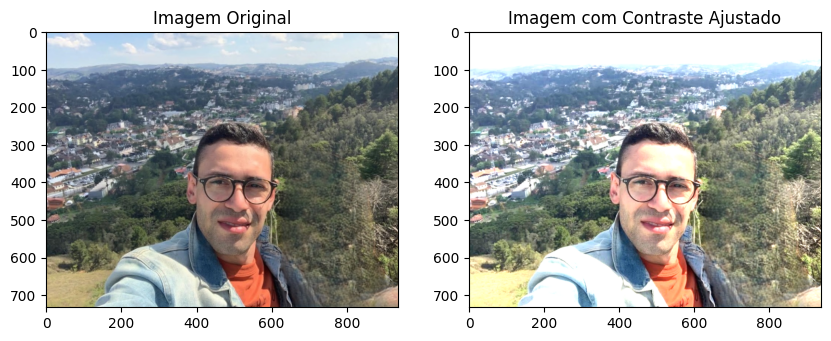

In [ ]:
# Criando uma nova figura para exibir as imagens
plt.figure(figsize=[10, 10])

# Exibindo a imagem original
# Lembre-se de que o OpenCV carrega imagens no formato BGR, então precisamos inverter os canais para exibir corretamente
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.title('Imagem Original')

# Exibindo a imagem com contraste ajustado
plt.subplot(122)
plt.imshow(image_contrast[:,:,::-1])
plt.title('Imagem com Contraste Ajustado')

plt.show()